In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("delivery_time.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.nunique()

Delivery Time    21
Sorting Time      9
dtype: int64

In [6]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Exploratory Data Analysis

In [8]:
df['Delivery Time'].skew()

0.3523900822831107

C:\Users\KP\mambaforge\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


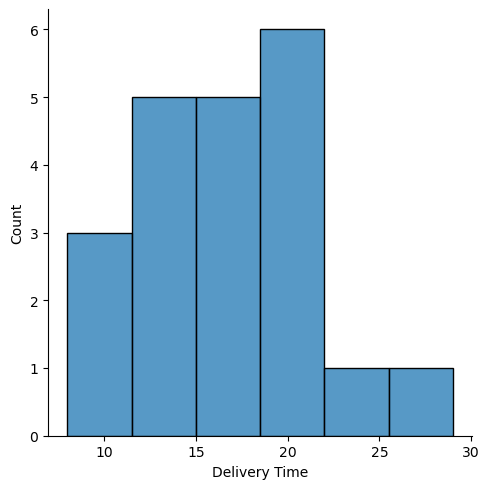

In [9]:
sns.displot(x=df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

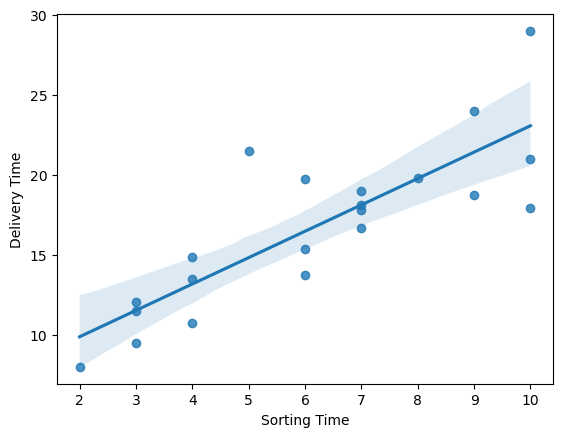

In [10]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=df)

<Axes: >

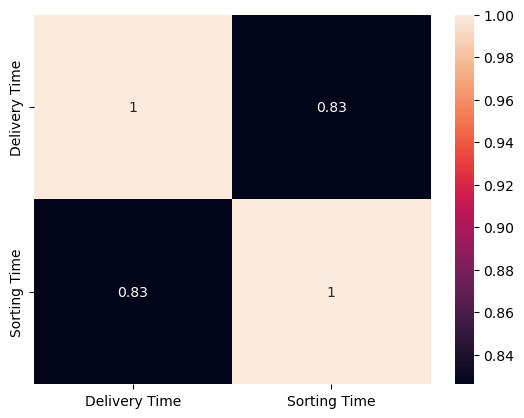

In [11]:
sns.heatmap(df.corr(), annot=True)

Heatmap shows strong correlation between sorting time and Delivery time.

## Model Building

In [12]:
##### Sampling the data  --- 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from math import sqrt
import joblib
import random

In [13]:
X = df['Sorting Time']
y = df['Delivery Time']

In [14]:
##### Splitting the data into train and test randomly
seed = random.randint(1000,10000)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=7666)

In [15]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [16]:
model = LinearRegression()
model_fit = model.fit(X_train,y_train)

In [17]:
pred = model_fit.predict(X_test.values.reshape(-1,1))

In [18]:
df_pred = pd.DataFrame(pred,columns = ['Pred'])
df_pred['Actual'] = y_test.values

In [19]:
print("The strength of the Model is :", r2_score(df_pred['Actual'],df_pred['Pred']))

The strength of the Model is : 0.901448900498008


In [20]:
print("Root Mean Square error is: ", sqrt(mean_squared_error(df_pred['Actual'],df_pred['Pred'])))

Root Mean Square error is:  1.360956746417265


In [21]:
a = float(model_fit.coef_[0,0])
b = model_fit.intercept_[0]

In [43]:
print("Coefficient  : ", np.round(a, 4))
print("Intercept : ", np.round(b, 4))

Coefficient  :  1.5999
Intercept :  6.6721


In [23]:
filename = 'delivery.sav'
joblib.dump(model_fit,filename)

['delivery.sav']

## Predicting

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

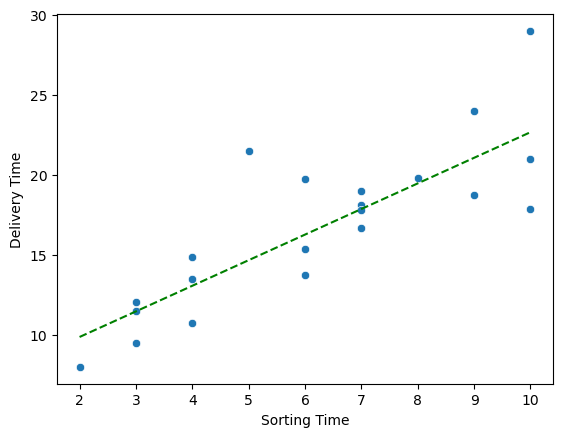

In [28]:
X_plot = np.linspace(2, 10, 100)
Y_plot = a*X_plot+b
plt.subplot()
sns.scatterplot(x="Sorting Time", y="Delivery Time", data=df)
sns.lineplot(x=X_plot, y=Y_plot, linestyle='--', c="g")

In [39]:
new_data=pd.DataFrame([3,8], columns=['sorting_time'])
new_data

,sorting_time
0,3
1,8


In [42]:
model_fit.predict(new_data)

C:\Users\KP\mambaforge\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[11.47167785],
       [19.47100671]])